# importing the necessary library 

In [4]:
import geopandas as gpd

# file 1 : f&t_mahsa_aoi.JPG

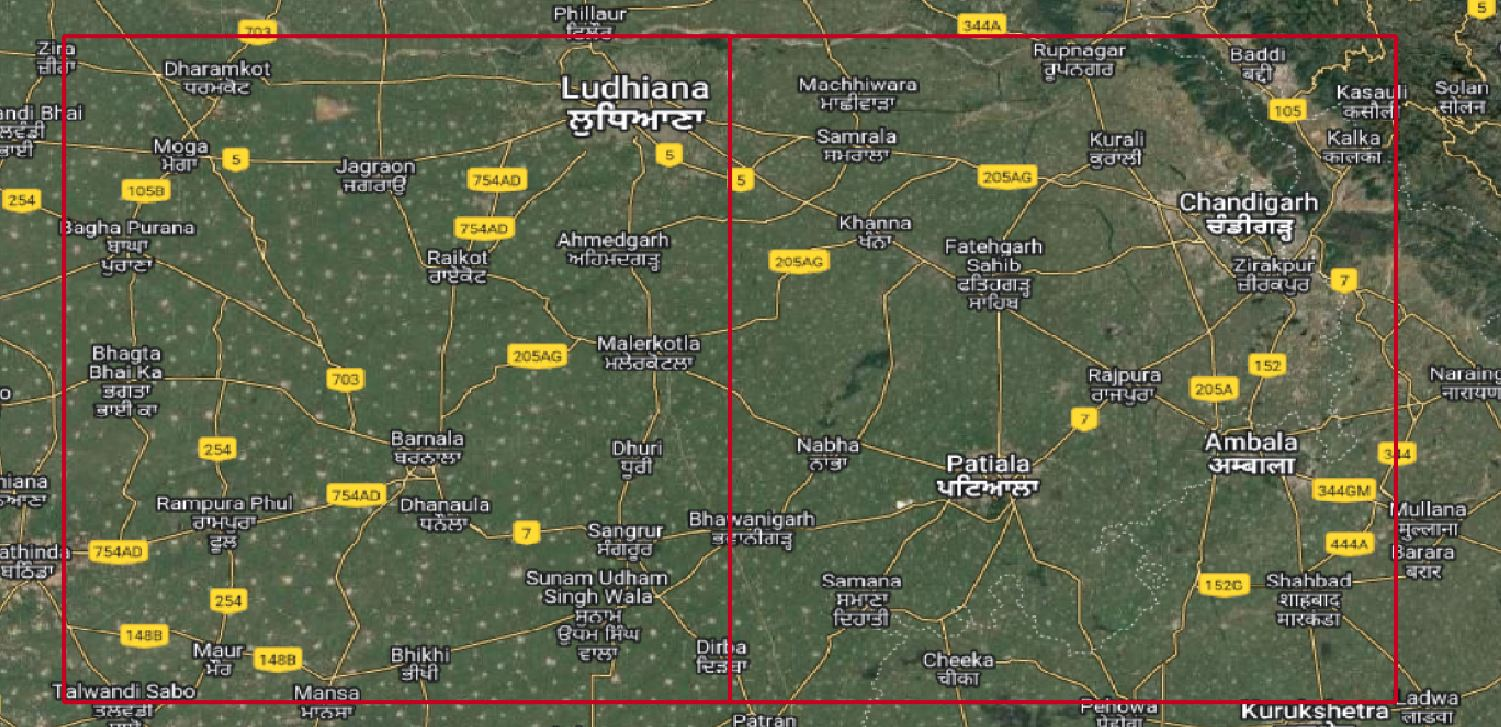

In [1]:
from IPython.display import Image, display

# Path to image
image_path = "/home/snehal/Downloads/MAHSA_AOI_F&T/f&t_mahsa_aoi.JPG"

# Displaying the image
display(Image(filename=image_path))


This contains the area where the archaelogical sites are located.

# file 2 : f&t_mahsa_aoi.gpkg

In [5]:
# Path to the .gpkg file 
mahsa_aoi_path = "f&t_mahsa_aoi.gpkg"

# Load GeoPackage
mahsa_aoi = gpd.read_file(mahsa_aoi_path)

# Show first few rows
print(mahsa_aoi.head())

# Print coordinate reference system
print(mahsa_aoi.crs)


                                            geometry
0  MULTIPOLYGON Z (((76 31 0, 77 31 0, 77 30 0, 7...
1  MULTIPOLYGON Z (((75 31 0, 76 31 0, 76 30 0, 7...
EPSG:4326


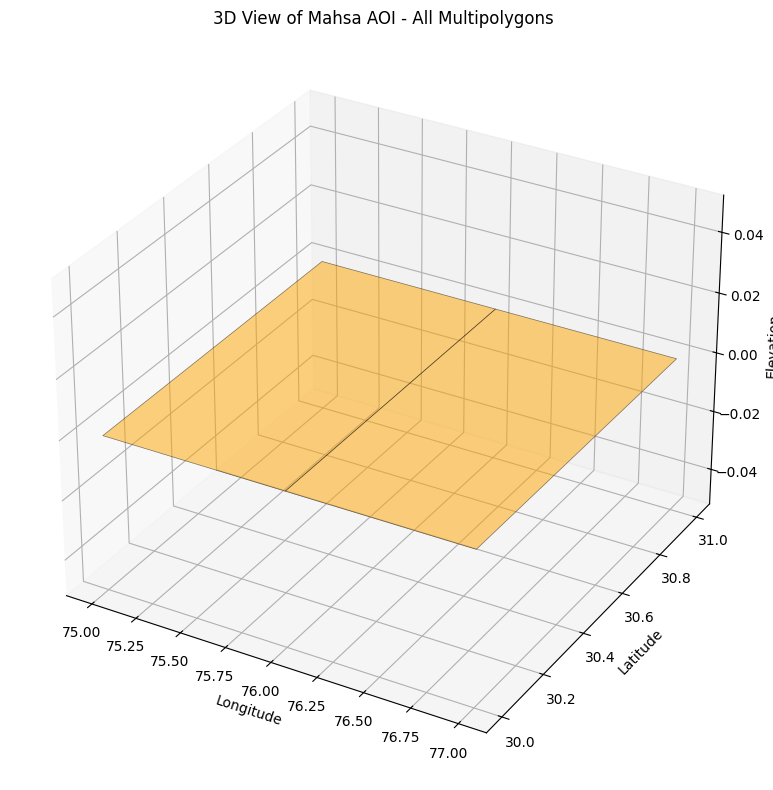

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for feature_idx, geom in enumerate(mahsa_aoi.geometry):
    if geom.geom_type == "MultiPolygon":
        for poly_idx, poly in enumerate(geom.geoms):
            coords = list(poly.exterior.coords)
            if len(coords) == 0:
                continue
            xs, ys, zs = zip(*coords)
            verts = [list(zip(xs, ys, zs))]
            ax.add_collection3d(
                Poly3DCollection(
                    verts,
                    alpha=0.5,
                    facecolor='orange',
                    edgecolor='black',
                    linewidths=0.5,
                    label=f"Polygon {feature_idx}-{poly_idx}"
                )
            )
    else:
        print(f"Skipping non-MultiPolygon geometry at index {feature_idx}")

# Label axes
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Elevation")
plt.title("3D View of Mahsa AOI - All Multipolygons")
plt.tight_layout()
plt.show()


# file 3 : mahsa_sites_20250707.gpkg

In [8]:

# Path to the .gpkg file 
mahsa_sites_path = "mahsa_sites_20250707.gpkg"

# Load GeoPackage
mahsa_sites = gpd.read_file(mahsa_sites_path)

# Show first few rows
print(mahsa_sites.head())

# Print coordinate reference system
print(mahsa_sites.crs)


              mahsa_id    heritage_location_classification  \
0  HL-ML-PO0002-000062             Historical Map Features   
1  HL-HM-PO0023-000251  Non Archaeological/Natural Feature   
2  HL-ML-PO0180-000083  Non Archaeological/Natural Feature   
3  HL-ML-PO0180-000091                  No Visible Remains   
4  HL-HM-PO0002-000078           Built/Historical Heritage   

  heritage_location_form heritage_location_interperation  \
0                  Mound                         Unknown   
1                   None                            None   
2                   None                            None   
3                  Mound                         Unknown   
4              Structure                          Temple   

                    geometry  
0  POINT (76.15243 30.69456)  
1  POINT (75.98772 30.70094)  
2  POINT (75.85416 30.66915)  
3  POINT (75.78339 30.77996)  
4  POINT (76.06664 30.71952)  
EPSG:4326


In [9]:
print(mahsa_sites.columns)

Index(['mahsa_id', 'heritage_location_classification',
       'heritage_location_form', 'heritage_location_interperation',
       'geometry'],
      dtype='object')


# going column by column

# Column 1 : "heritage_location_classification"

# unique values of the column

In [17]:

print(heritage_loc := mahsa_sites["heritage_location_classification"].unique())

['Historical Map Features' 'Non Archaeological/Natural Feature'
 'No Visible Remains' 'Built/Historical Heritage'
 'Multi Feature Heritage Sites']


# Display the percentage of each heritage location classification

In [ ]:
print("Percentage of each heritage location classification:")
(mahsa_sites["heritage_location_classification"].value_counts(normalize=True) * 100)


Percentage of each heritage location classification:


heritage_location_classification
No Visible Remains                    41.935484
Non Archaeological/Natural Feature    34.677419
Historical Map Features               14.516129
Built/Historical Heritage              8.064516
Multi Feature Heritage Sites           0.806452
Name: proportion, dtype: float64

# visually

/tmp/ipykernel_10094/1349407596.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


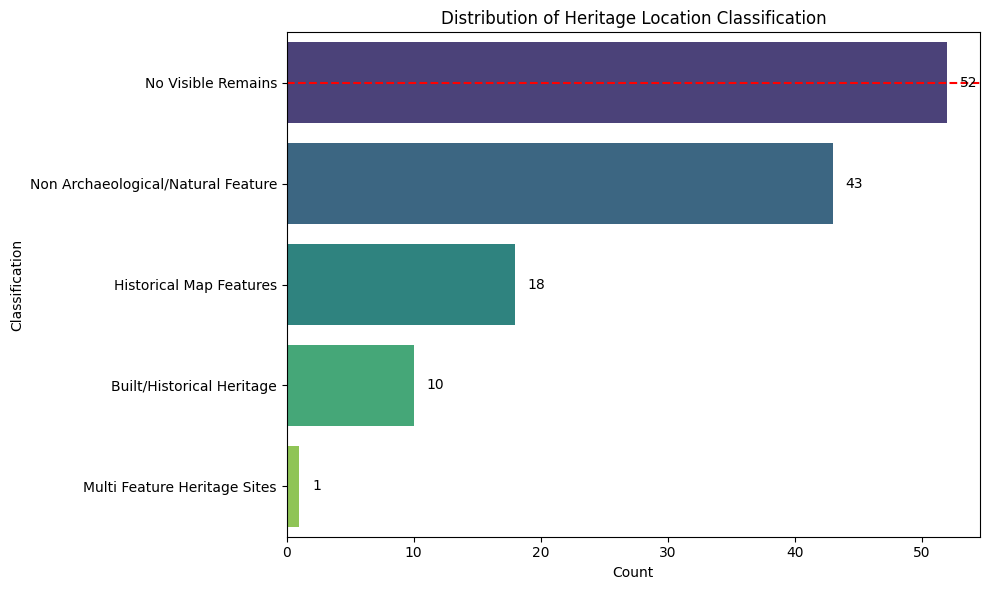

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=mahsa_sites, 
    y="heritage_location_classification", 
    order=mahsa_sites["heritage_location_classification"].value_counts().index,
    palette="viridis"
)

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.text(count + 1, y, str(count), va='center', fontsize=10)

# Highlight the most common class
top_class = mahsa_sites["heritage_location_classification"].value_counts().idxmax()
top_class_position = mahsa_sites["heritage_location_classification"].value_counts().index.get_loc(top_class)

# Draw a horizontal line at the most common class
ax.axhline(y=top_class_position, color='red', linewidth=1.5, linestyle='--')



# Title and axis labels
plt.title("Distribution of Heritage Location Classification")
plt.xlabel("Count")
plt.ylabel("Classification")
plt.tight_layout()
plt.show()


# Column 2 : "heritage_loc_form "

# unique values of the column

In [14]:
print(heritage_loc_form := mahsa_sites["heritage_location_form"].unique())

['Mound' None 'Structure' 'Multi-Feature' 'Small Mound' 'Structure/s'
 'Medium Mound']


# Display the percentage of each heritage location form

In [15]:
print("Percentage of each heritage location form:")
(mahsa_sites["heritage_location_form"].value_counts(normalize=True) * 100)


Percentage of each heritage location form:


heritage_location_form
Mound            78.378378
Structure         8.108108
Small Mound       5.405405
Multi-Feature     2.702703
Structure/s       2.702703
Medium Mound      2.702703
Name: proportion, dtype: float64

# visually

/tmp/ipykernel_10094/1091779375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


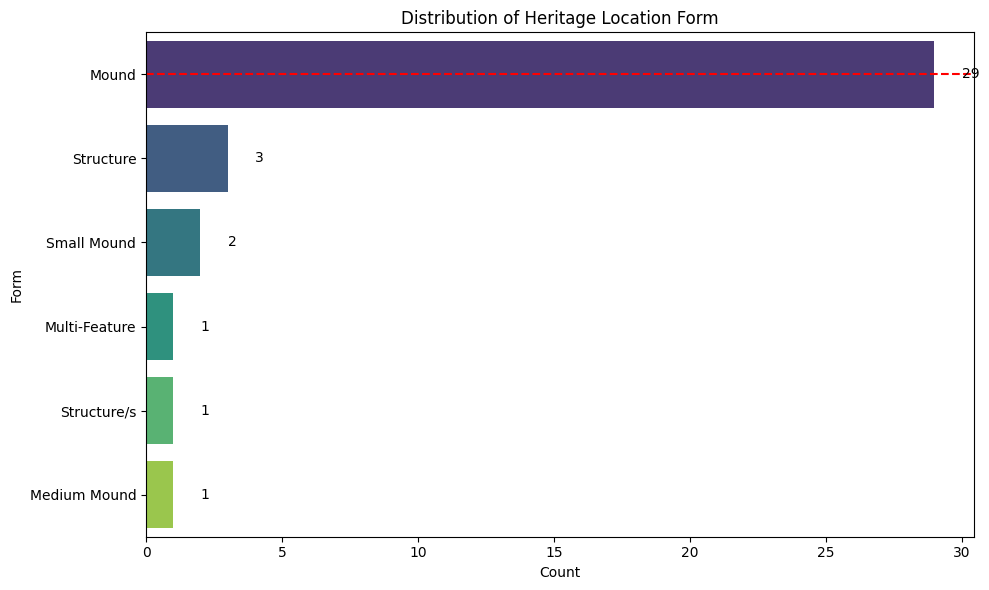

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=mahsa_sites, 
    y="heritage_location_form", 
    order=mahsa_sites["heritage_location_form"].value_counts().index,
    palette="viridis"
)

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.text(count + 1, y, str(count), va='center', fontsize=10)

# Highlight the most common class
top_class = mahsa_sites["heritage_location_form"].value_counts().idxmax()
top_class_position = mahsa_sites["heritage_location_form"].value_counts().index.get_loc(top_class)

# Draw a horizontal line at the most common class
ax.axhline(y=top_class_position, color='red', linewidth=1.5, linestyle='--')



# Title and axis labels
plt.title("Distribution of Heritage Location Form")
plt.xlabel("Count")
plt.ylabel("Form")
plt.tight_layout()
plt.show()
